In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [2]:
bank = pd.read_csv('datasets/bank.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
bank.info()

<class 'pandas.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4334 non-null   int64
 1   job        4334 non-null   str  
 2   marital    4334 non-null   str  
 3   education  4334 non-null   str  
 4   default    4334 non-null   str  
 5   balance    4334 non-null   int64
 6   housing    4334 non-null   str  
 7   loan       4334 non-null   str  
 8   contact    4334 non-null   str  
 9   day        4334 non-null   int64
 10  month      4334 non-null   str  
 11  duration   4334 non-null   int64
 12  campaign   4334 non-null   int64
 13  pdays      4334 non-null   int64
 14  previous   4334 non-null   int64
 15  poutcome   4334 non-null   str  
 16  y          4334 non-null   str  
dtypes: int64(7), str(10)
memory usage: 575.7 KB


In [4]:
bank['y'] = bank['y'].replace({'no':0, 'yes':1})
bank['month'] = bank['month'].replace({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 
                        'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 
                        'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})

In [5]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,10,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,5,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,4,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,6,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,5,226,1,-1,0,unknown,0


In [6]:
bank.shape

(4334, 17)

In [7]:
bank.info()

<class 'pandas.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4334 non-null   int64 
 1   job        4334 non-null   str   
 2   marital    4334 non-null   str   
 3   education  4334 non-null   str   
 4   default    4334 non-null   str   
 5   balance    4334 non-null   int64 
 6   housing    4334 non-null   str   
 7   loan       4334 non-null   str   
 8   contact    4334 non-null   str   
 9   day        4334 non-null   int64 
 10  month      4334 non-null   object
 11  duration   4334 non-null   int64 
 12  campaign   4334 non-null   int64 
 13  pdays      4334 non-null   int64 
 14  previous   4334 non-null   int64 
 15  poutcome   4334 non-null   str   
 16  y          4334 non-null   object
dtypes: int64(7), object(2), str(8)
memory usage: 575.7+ KB


In [8]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000
mean,40.991924,1410.637517,15.913936,264.544301,2.806876,39.670974,0.544070
std,10.505378,3010.612091,8.216673,260.642141,3.129682,99.934062,1.702219
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,67.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,440.000000,16.000000,186.000000,2.000000,-1.000000,0.000000
75%,48.000000,1464.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [10]:
bank.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4334,4334,4334,4334,4334,4334,4334,4334,4334,4334
unique,12,3,3,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,5,unknown,0
freq,942,2680,2306,4261,2476,3650,2801,1339,3555,3832


In [11]:
bank['y'].value_counts()

y
0    3832
1     502
Name: count, dtype: int64

In [12]:
X = bank.drop(['y'], axis=1)
y = bank['y']

In [13]:
ohe = OneHotEncoder()
ohe = ohe.fit(X[['job', 'marital', 'education', 'default'
                , 'housing', 'loan', 'contact', 'poutcome']])
X_ohe = ohe.transform(X[['job', 'marital', 'education', 'default'
                , 'housing', 'loan', 'contact', 'poutcome']])

In [14]:
X_ohe

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34672 stored elements and shape (4334, 31)>

In [15]:
X_ohe_new = X_ohe.toarray()
X_ohe_new

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]], shape=(4334, 31))

In [16]:
ohe.get_feature_names_out(['job', 'marital', 'education', 'default'
                , 'housing', 'loan', 'contact', 'poutcome'])

array(['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'default_no', 'default_yes', 'housing_no', 'housing_yes',
       'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'], dtype=object)

In [17]:
X_ohe_new[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.]])

In [18]:
X_ohe_df = pd.DataFrame(X_ohe_new, columns=ohe.get_feature_names_out(['job', 'marital', 'education', 'default'
                , 'housing', 'loan', 'contact', 'poutcome']))
X_ohe_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [19]:
X_new = pd.concat([X[['age','balance','day','month','duration'
                     ,'campaign','pdays','previous']], X_ohe_df], axis=1)
X_new

,age,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,10,79,1,-1,0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,33,4789,11,5,220,1,339,4,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,35,1350,16,4,185,1,330,1,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,30,1476,3,6,199,4,-1,0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,59,0,5,5,226,1,-1,0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4329,33,-333,30,7,329,5,-1,0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4330,57,-3313,9,5,153,1,-1,0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4331,57,295,19,8,151,11,-1,0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4332,28,1137,6,2,129,4,211,3,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [20]:
y = y.astype(int)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [22]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [23]:
model.score(X_train, y_train)

1.0

In [24]:
model.score(X_test, y_test)

0.8700999231360492

In [25]:
y_pred = model.predict(X_test)

In [26]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1066   88]
 [  81   66]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1154
           1       0.43      0.45      0.44       147

    accuracy                           0.87      1301
   macro avg       0.68      0.69      0.68      1301
weighted avg       0.87      0.87      0.87      1301



> while accuracy is 87% and precision of class 0 is 93%, precision of class 1 is low at 43%.

In [27]:
probs = model.predict_proba(X_test)
probs

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], shape=(1301, 2))

In [28]:
scores = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, scores)

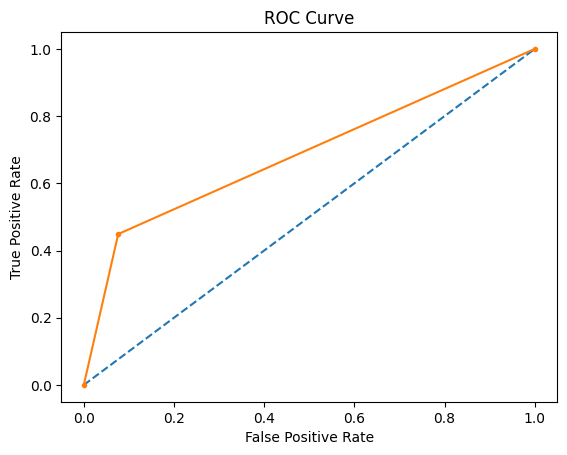

In [29]:
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

##### Resampling

In [30]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [31]:
unique_elements, counts_elements = np.unique(y, return_counts=True)
print('Frequency of each category:')
print(np.asarray((unique_elements, counts_elements)))

Frequency of each category:
[[   0    1]
 [3832  502]]


In [32]:
unique_elements, counts_elements = np.unique(y_resampled, return_counts=True)
print('Frequency of each category:')
print(np.asarray((unique_elements, counts_elements)))

Frequency of each category:
[[   0    1]
 [2678 2678]]


In [33]:
standard_scalar = StandardScaler()
X_train_sc_resampled = standard_scalar.fit_transform(X_resampled)
X_test_sc = standard_scalar.transform(X_test)

In [34]:
tree_model = DecisionTreeClassifier()

In [35]:
tree_model.fit(X_train_sc_resampled, y_resampled)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [36]:
tree_model.score(X_train_sc_resampled, y_resampled)

1.0

In [37]:
tree_model.score(X_test_sc, y_test)

0.8554957724827056

In [38]:
y_pred1 = tree_model.predict(X_test_sc)

In [39]:
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[1049  105]
 [  83   64]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1154
           1       0.38      0.44      0.41       147

    accuracy                           0.86      1301
   macro avg       0.65      0.67      0.66      1301
weighted avg       0.86      0.86      0.86      1301



> Overfitting

In [40]:
model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)
model.fit(X_train_sc_resampled, y_resampled)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",10
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [41]:
tree_model.score(X_train_sc_resampled, y_resampled)

1.0

In [42]:
tree_model.score(X_test_sc, y_test)

0.8554957724827056

In [43]:
y_pred1 = tree_model.predict(X_test_sc)

In [44]:
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[1049  105]
 [  83   64]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1154
           1       0.38      0.44      0.41       147

    accuracy                           0.86      1301
   macro avg       0.65      0.67      0.66      1301
weighted avg       0.86      0.86      0.86      1301



> When limit depth of the tree, we had better accuracy.